# Implemente o algoritmo de Backpropagation em uma rede MLP e o use para a classificação dos dados da Iris de Fisher.

In [125]:
# Importando as Bibliotecas necesárias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [121]:
# Função de ativação (sigmoide)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivada da função sigmoide
def sigmoid_derivative(x):
    return x * (1 - x)

# Função de normalização dos dados
def normalize(X):
    return (X - np.min(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0))

# Classe MLP com Backpropagation
class MLP:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        # Inicializando os pesos e bias
        self.learning_rate = learning_rate
        self.weights_input_hidden = np.random.randn(input_size, hidden_size) * 0.1
        self.weights_hidden_output = np.random.randn(hidden_size, output_size) * 0.1
        self.bias_hidden = np.zeros((1, hidden_size))
        self.bias_output = np.zeros((1, output_size))

    def forward(self, X):
        # Propagação para frente (cálculo das ativações)
        self.z1 = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.a1 = sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.weights_hidden_output) + self.bias_output
        self.a2 = sigmoid(self.z2)
        return self.a2

    def backward(self, X, y, output):
        # Retropropagação (cálculo dos gradientes)
        m = y.shape[0]

        # Erro da camada de saída
        error_output = output - y
        delta_output = error_output * sigmoid_derivative(output)

        # Erro da camada oculta
        error_hidden = np.dot(delta_output, self.weights_hidden_output.T)
        delta_hidden = error_hidden * sigmoid_derivative(self.a1)

        # Atualização dos pesos e bias
        self.weights_hidden_output -= self.learning_rate * np.dot(self.a1.T, delta_output) / m
        self.bias_output -= self.learning_rate * np.sum(delta_output, axis=0, keepdims=True) / m
        self.weights_input_hidden -= self.learning_rate * np.dot(X.T, delta_hidden) / m
        self.bias_hidden -= self.learning_rate * np.sum(delta_hidden, axis=0, keepdims=True) / m

    def train(self, X, y, epochs=1000):
        # Treinamento do modelo
        for epoch in range(epochs):
            output = self.forward(X)
            y_encoded = self.one_hot_encode(y, output.shape[1])  # Usar rótulos inteiros diretamente
            self.backward(X, y_encoded, output)

            if epoch % 100 == 0:
                loss = np.mean(np.square(y_encoded - output))
                print(f'Epoch {epoch}, Loss: {loss}')

    def predict(self, X):
        # Fazendo previsões
        output = self.forward(X)
        return np.argmax(output, axis=1)

    def one_hot_encode(self, y, num_classes):
        # Função para codificar os rótulos como one-hot manualmente
        one_hot = np.zeros((y.size, num_classes))
        one_hot[np.arange(y.size), y] = 1
        return one_hot

# Preparação dos dados Iris
def prepare_iris_data():
    # Carrega o dataset Iris
    iris = datasets.load_iris()
    X = iris.data
    y = iris.target

    # Normalizando os dados de entrada
    X = normalize(X)

    # Dividindo em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

# Treinando e avaliando a rede MLP no dataset Iris
if __name__ == "__main__":
    # Preparar os dados
    X_train, X_test, y_train, y_test = prepare_iris_data()

    # Instanciar o modelo
    mlp = MLP(input_size=4, hidden_size=9, output_size=3, learning_rate=0.1)

    # Treinar o modelo
    mlp.train(X_train, y_train, epochs=1000)

    # Fazer predições no conjunto de teste
    predictions = mlp.predict(X_test)

    # Avaliar a acurácia
    accuracy = np.mean(predictions == y_test)
    print(f'Acurácia: {accuracy * 100:.2f}%')


Epoch 0, Loss: 0.2520193152361384
Epoch 100, Loss: 0.2222451047883735
Epoch 200, Loss: 0.22136378081447247
Epoch 300, Loss: 0.2210059659304041
Epoch 400, Loss: 0.22057472317268811
Epoch 500, Loss: 0.2200191460499697
Epoch 600, Loss: 0.21929690061069723
Epoch 700, Loss: 0.2183556270852969
Epoch 800, Loss: 0.21713036663590685
Epoch 900, Loss: 0.21554205419548872
Acurácia: 93.33%


In [142]:
# Podemos calcular a matriz de confusão para avaliar o desempenho do modelo
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, predictions)
print("\nMatriz de Confusão:")
print(cm)

# Imprimindo o relatório de classificação com precisão, recall e F1-score
print("\nRelatório de Classificação:")
print(classification_report(y_test, predictions))



Matriz de Confusão:
[[10  0  0]
 [ 0  9  0]
 [ 0  2  9]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.82      1.00      0.90         9
           2       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30



<Figure size 1000x800 with 0 Axes>

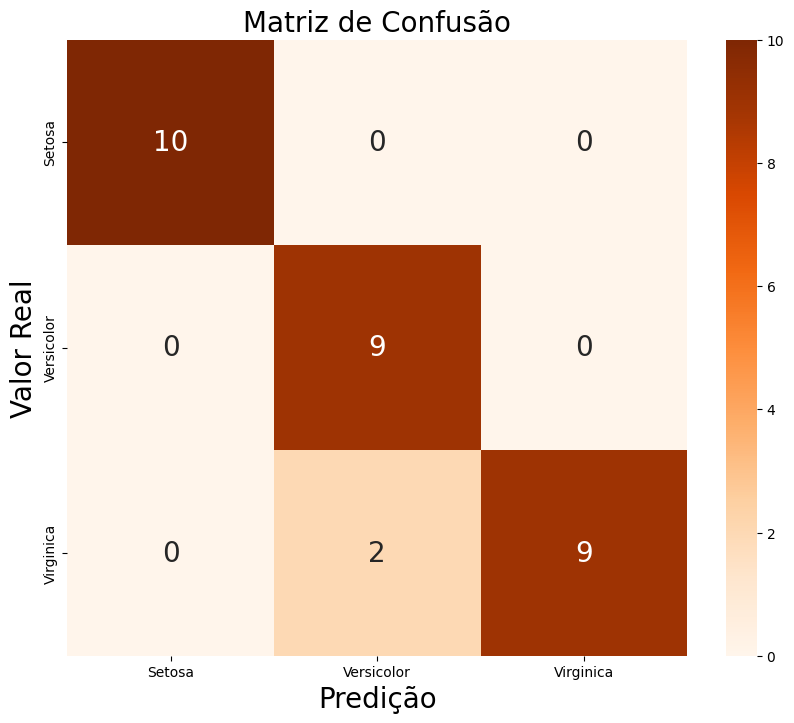

In [143]:
plt.figure(figsize=(10, 8))
#sns.heatmap(cm, annot=True, fmt='g', cmap='Oranges', annot_kws={"size": 20})  # Aumenta o tamanho da fonte das anotações

# Nomes das classes
class_names = ['Setosa', 'Versicolor', 'Virginica']

# Gráfico da matriz de confusão com os nomes das classes
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Oranges', annot_kws={"size": 20},
            xticklabels=class_names, yticklabels=class_names)  # Adiciona os nomes das classes

plt.xlabel('Predição', fontsize=20)
plt.ylabel('Valor Real', fontsize=20)
plt.title('Matriz de Confusão', fontsize=20)
plt.show()


# Perguntas básicas da MLP:

- Quantas entradas? 4
- Quantas saídas? 3
- Quantas camadas escondidas? 9
- Quantos neurônios na(s) camada(s) escondida(s)? 4 * 9 = 37 neurônios

-  Como separar os dados de treinamento e teste? Usar train_test_split do sklearn, neste caso foi 80 x 20.

-  Como verificar a qualidade do treinamento? Neste caso usei o relatório de classificação com precisão, recall e F1-score e a Matriz de Confusão.